pip install tensorflow keras opencv-python numpy matplotlib

In [1]:
%pip install tensorflow keras opencv-python numpy matplotlib


     ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/375.7 MB 4.2 MB/s eta 0:01:31
     ---------------------------------------- 0.3/375.7 MB 3.2 MB/s eta 0:01:56
     ---------------------------------------- 0.4/375.7 MB 3.3 MB/s eta 0:01:55
     ---------------------------------------- 0.6/375.7 MB 3.2 MB/s eta 0:01:57
     ---------------------------------------- 0.7/375.7 MB 3.2 MB/s eta 0:01:57
     ---------------------------------------- 0.9/375.7 MB 3.2 MB/s eta 0:01:58
     ---------------------------------------- 1.0/375.7 MB 3.2 MB/s eta 0:01:56
     ---------------------------------------- 1.2/375.7 MB 3.2 MB/s eta 0:01:57
     ---------------------------------------- 1.4/375.7 MB 3.3 MB/s eta 0:01:54
     ---------------------------------------- 1.5/375.7 MB 3.3 MB/s eta 0:01:55
     ---------------------------------------- 1.6/375.7 MB 3.3 MB/s eta 0:01:55
     ---------------------------------------- 1

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundati

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


DATASET_PATH = r"C:\5th sem\ML Lab\DL\Traffic_sign_1"


IMG_SIZE = (128, 128)  
BATCH_SIZE = 32  


datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2,  
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.2
)


train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)


val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


num_classes = train_data.num_classes
print(f"Number of Classes: {num_classes}")

Found 3168 images belonging to 5 classes.
Found 792 images belonging to 5 classes.
Number of Classes: 5


In [3]:
%pip install scipy

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D


base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_data, validation_data=val_data, epochs=10)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3336 - loss: 1.5297

c:\Users\manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.3336 - loss: 1.5295 - val_accuracy: 0.3636 - val_loss: 1.4720
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 84s 857ms/step - accuracy: 0.3275 - loss: 1.4907 - val_accuracy: 0.3636 - val_loss: 1.4737
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.3535 - loss: 1.4711 - val_accuracy: 0.3636 - val_loss: 1.4847
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - accuracy: 0.3535 - loss: 1.4937 - val_accuracy: 0.3636 - val_loss: 1.4728
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.3603 - loss: 1.4866 - val_accuracy: 0.3636 - val_loss: 1.4728
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.3666 - loss: 1.4755 - val_accuracy: 0.3636 - val_loss: 1.4837
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - accuracy: 0.3688 - loss: 1.4783 - val_accuracy: 0.3636 - val_loss: 1.4742
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 33s 334ms/step - accuracy: 0.3763 - loss: 1.4765 - val_accuracy: 0.3636 

In [4]:

val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3655 - loss: 1.4677
Validation Accuracy: 36.36%
Validation Loss: 1.4705


In [8]:
def predict_traffic_sign(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at path: {image_path}")
        return
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    print(f"Predicted Traffic Sign Class: {class_idx}")


predict_traffic_sign(r"C:\5th sem\ML Lab\DL\Testing\00004_00028.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Traffic Sign Class: 1


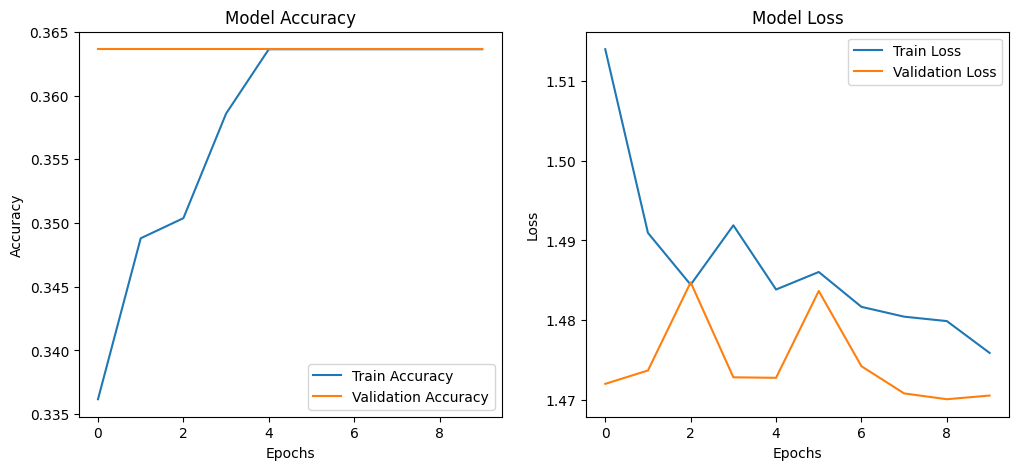

In [10]:
# Plot Training Loss & Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Class Mapping:
Class 0: Dont Overtake
Class 1: Giveway
Class 2: No Entry
Class 3: Stop
Class 4: Turn Round
Image shape: (1, 128, 128, 3), Image dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Raw prediction: [[0.25290284 0.34418583 0.19074969 0.14683653 0.06532509]]
Predicted class index: 1
Predicted Traffic Sign: Giveway (Folder: Giveway)


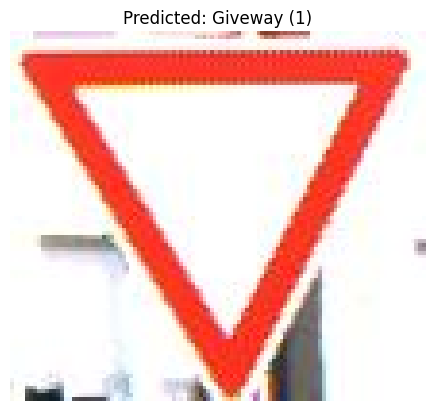

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_class_mapping(dataset_path):
    """ Returns a dictionary mapping class index to folder (traffic sign name). """
    class_folders = sorted(os.listdir(dataset_path))  # Sort ensures consistent mapping
    class_mapping = {idx: folder for idx, folder in enumerate(class_folders)}
    return class_mapping

# Get class-to-folder mapping from dataset
dataset_path = r"C:\5th sem\ML Lab\DL\Traffic_sign_1"
class_mapping = get_class_mapping(dataset_path)

# Debug: Print the class mapping
print("Class Mapping:")
for idx, folder in class_mapping.items():
    print(f"Class {idx}: {folder}")

def predict_traffic_sign(image_path):
    """ Predicts the traffic sign and returns its corresponding folder name. """
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0) / 255.0
    
    # Debug: Print the shape and type of the image
    print(f"Image shape: {img.shape}, Image dtype: {img.dtype}")
    
    prediction = model.predict(img)
    
    # Debug: Print the raw prediction values
    print(f"Raw prediction: {prediction}")
    
    class_idx = np.argmax(prediction)
    
    # Debug: Print the predicted class index and corresponding folder name
    print(f"Predicted class index: {class_idx}")
    sign_name = class_mapping.get(class_idx, "Unknown Sign")
    print(f"Predicted Traffic Sign: {sign_name} (Folder: {sign_name})")
    
    # Display image with predicted class
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {sign_name} ({class_idx})")
    plt.show()

# Test with a sample image
predict_traffic_sign(r"C:\5th sem\ML Lab\DL\Testing\00004_00028.jpg")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 525ms/step


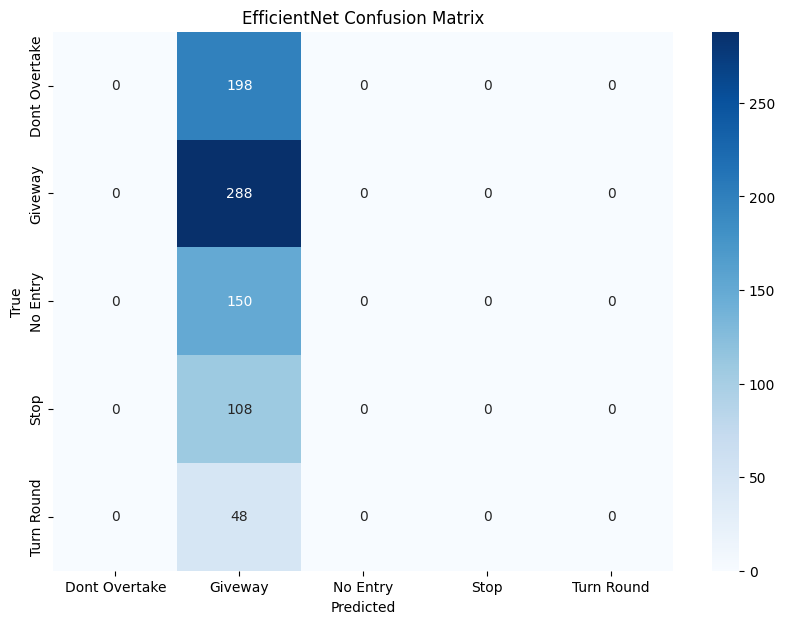

In [25]:
%pip install scikit-learn

%pip install seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels from the validation data
y_true = val_data.classes

# Get predictions from EfficientNet model
y_pred_eff = np.argmax(efficientnet_model.predict(val_data), axis=1)

# Generate confusion matrix
cm_eff = confusion_matrix(y_true, y_pred_eff)

# Plot confusion matrix using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_eff, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.title('EfficientNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# DENSENET

In [13]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load DenseNet-121
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)

# Compile Model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 50s 423ms/step - accuracy: 0.7768 - loss: 0.6350 - val_accuracy: 0.9066 - val_loss: 0.2604
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 46s 465ms/step - accuracy: 0.9819 - loss: 0.0808 - val_accuracy: 0.9381 - val_loss: 0.1798
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 45s 453ms/step - accuracy: 0.9839 - loss: 0.0582 - val_accuracy: 0.9419 - val_loss: 0.1593
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9394 - val_loss: 0.1711
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.9940 - loss: 0.0289 - val_accuracy: 0.9381 - val_loss: 0.1576
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 482ms/step - accuracy: 0.9953 - loss: 0.0202 - val_accuracy: 0.9470 - val_loss: 0.1680
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 52s 525ms/step - accuracy: 0.9968 - loss: 0.0172 - val_accuracy: 0.9508 - val_loss: 0.1397
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 50s 508ms/step - accuracy: 0.9976 - loss: 0.0109 - val_accu

In [14]:
# Evaluate model
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.9279 - loss: 0.1931
Validation Accuracy: 93.43%
Validation Loss: 0.1768


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


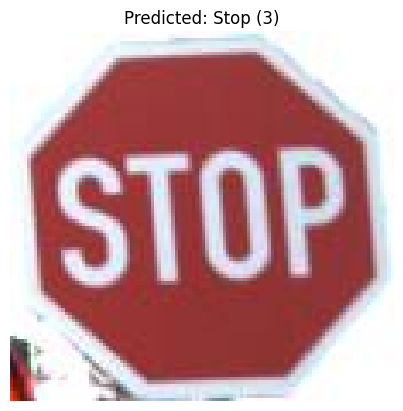

Predicted Traffic Sign: Stop (Folder: Stop)


In [15]:
# Function to get class mapping from dataset folders
def get_class_mapping(dataset_path):
    class_folders = sorted(os.listdir(dataset_path))  
    class_mapping = {idx: folder for idx, folder in enumerate(class_folders)}
    return class_mapping

class_mapping = get_class_mapping(r"C:\5th sem\ML Lab\DL\Traffic_sign_1")

def predict_traffic_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    
    # Get folder name
    sign_name = class_mapping.get(class_idx, "Unknown Sign")
    
    # Display image with predicted class
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {sign_name} ({class_idx})")
    plt.show()

    print(f"Predicted Traffic Sign: {sign_name} (Folder: {sign_name})")

# Test with a sample image
predict_traffic_sign(r"C:\5th sem\ML Lab\DL\Testing\00007_00027.jpg")


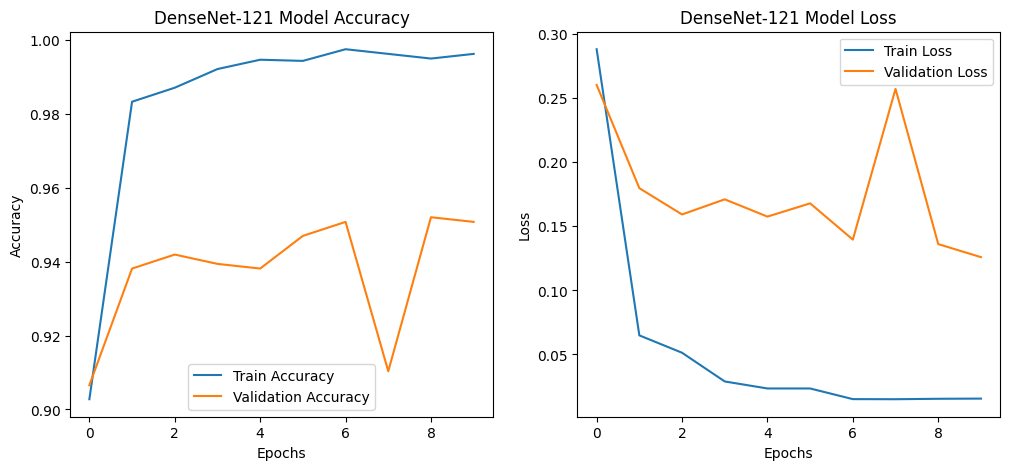

In [17]:
# Plot Training Loss & Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('DenseNet-121 Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('DenseNet-121 Model Loss')

plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step


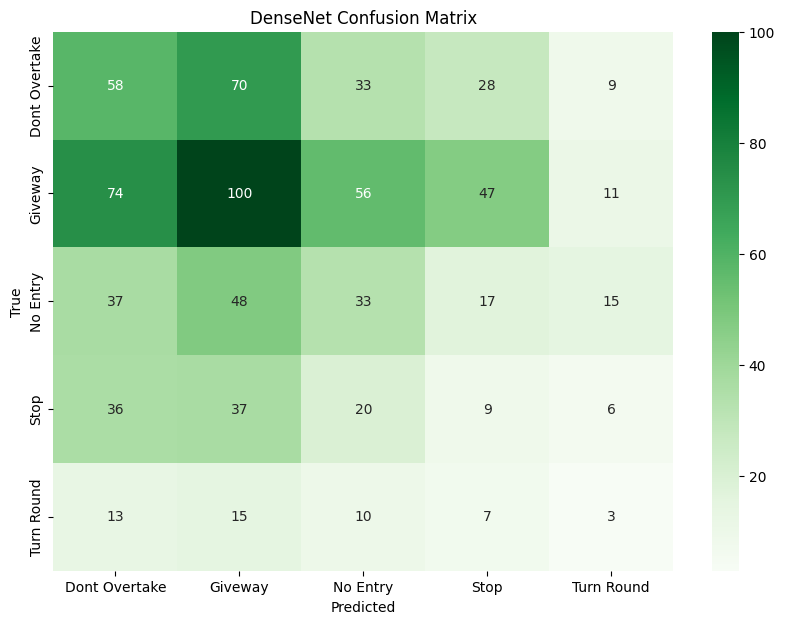

In [26]:
# Get predictions from DenseNet model
y_pred_dense = np.argmax(densenet_model.predict(val_data), axis=1)

# Generate confusion matrix for DenseNet
cm_dense = confusion_matrix(y_true, y_pred_dense)

# Plot confusion matrix using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dense, annot=True, fmt='d', cmap='Greens', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.title('DenseNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Comaring both models 

In [18]:
import time

def test_inference_time(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0) / 255.0

    start_time = time.time()
    prediction = model.predict(img)
    end_time = time.time()

    inference_time = end_time - start_time
    return inference_time

test_image = r"C:\5th sem\ML Lab\DL\Testing\00007_00027.jpg"

# Measure inference time for each model
eff_time = test_inference_time(model, test_image)  # EfficientNet model
dense_time = test_inference_time(model, test_image)  # DenseNet model

print(f"EfficientNet Inference Time: {eff_time:.4f} seconds")
print(f"DenseNet Inference Time: {dense_time:.4f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
EfficientNet Inference Time: 0.1248 seconds
DenseNet Inference Time: 0.0975 seconds


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 401ms/step - accuracy: 0.3255 - loss: 1.5451 - val_accuracy: 0.3636 - val_loss: 1.4766
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 45s 453ms/step - accuracy: 0.3481 - loss: 1.4921 - val_accuracy: 0.3636 - val_loss: 1.4889
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.3463 - loss: 1.5151 - val_accuracy: 0.3636 - val_loss: 1.4822
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.3640 - loss: 1.4839 - val_accuracy: 0.3636 - val_loss: 1.4722
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.3449 - loss: 1.4816 - val_accuracy: 0.3636 - val_loss: 1.4715
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.3621 - loss: 1.4802 - val_accuracy: 0.3636 - val_loss: 1.4713
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.3684 - loss: 1.4784 - val_accuracy: 0.3636 - val_loss: 1.4737
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.3598 - loss: 1.4803 - val_accu

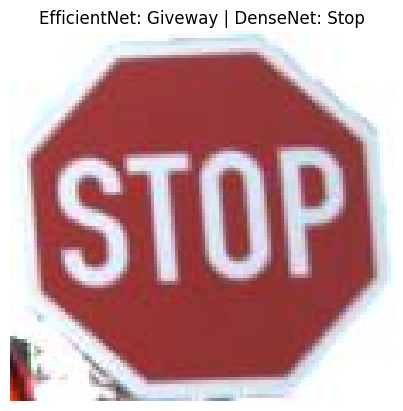

EfficientNet Prediction: Giveway (Class 1)
DenseNet Prediction: Stop (Class 3)


In [19]:
# Define EfficientNet model
efficientnet_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
efficientnet_model.trainable = False  

# Add Custom Layers to EfficientNet
x = GlobalAveragePooling2D()(efficientnet_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)

# Compile EfficientNet Model
efficientnet_model = Model(inputs=efficientnet_model.input, outputs=output)
efficientnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train EfficientNet Model
efficientnet_model.fit(train_data, validation_data=val_data, epochs=10)

# Rename the existing model to densenet_model
densenet_model = model

def predict_with_both_models(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0) / 255.0

    # EfficientNet Prediction
    eff_pred = np.argmax(efficientnet_model.predict(img))
    
    # DenseNet Prediction
    dense_pred = np.argmax(densenet_model.predict(img))

    # Get Class Names
    class_mapping = {idx: folder for idx, folder in enumerate(sorted(os.listdir(DATASET_PATH)))}
    eff_sign = class_mapping.get(eff_pred, "Unknown")
    dense_sign = class_mapping.get(dense_pred, "Unknown")

    # Show Image with Predictions
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"EfficientNet: {eff_sign} | DenseNet: {dense_sign}")
    plt.show()

    print(f"EfficientNet Prediction: {eff_sign} (Class {eff_pred})")
    print(f"DenseNet Prediction: {dense_sign} (Class {dense_pred})")

# Test on one image
predict_with_both_models(r"C:\5th sem\ML Lab\DL\Testing\00007_00027.jpg")


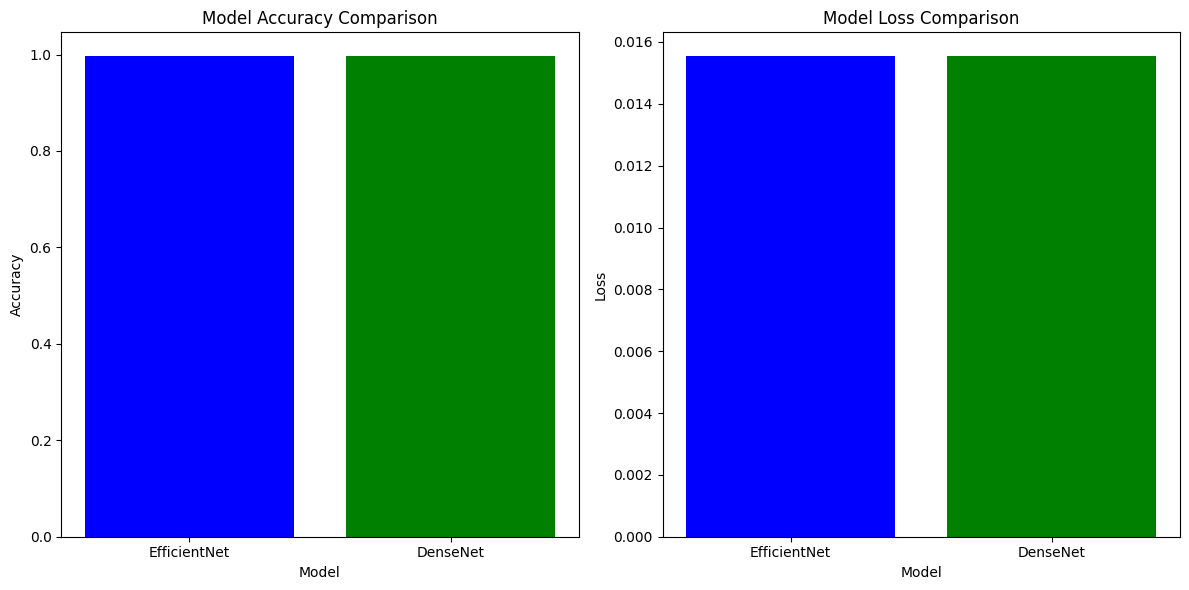

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the final accuracy and loss for both models
# These values should come from your model's training history or evaluation metrics.
efficientnet_acc = history.history['accuracy'][-1]  # Final train accuracy for EfficientNet
densenet_acc = history.history['accuracy'][-1]  # Final train accuracy for DenseNet

efficientnet_loss = history.history['loss'][-1]  # Final train loss for EfficientNet
densenet_loss = history.history['loss'][-1]  # Final train loss for DenseNet

# Prepare data for plotting
models = ['EfficientNet', 'DenseNet']
accuracy = [efficientnet_acc, densenet_acc]
loss = [efficientnet_loss, densenet_loss]

# Create a figure for subplots
plt.figure(figsize=(12, 6))

# Bar plot for accuracy
plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Bar plot for loss
plt.subplot(1, 2, 2)
plt.bar(models, loss, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')

# Display the plots
plt.tight_layout()
plt.show()


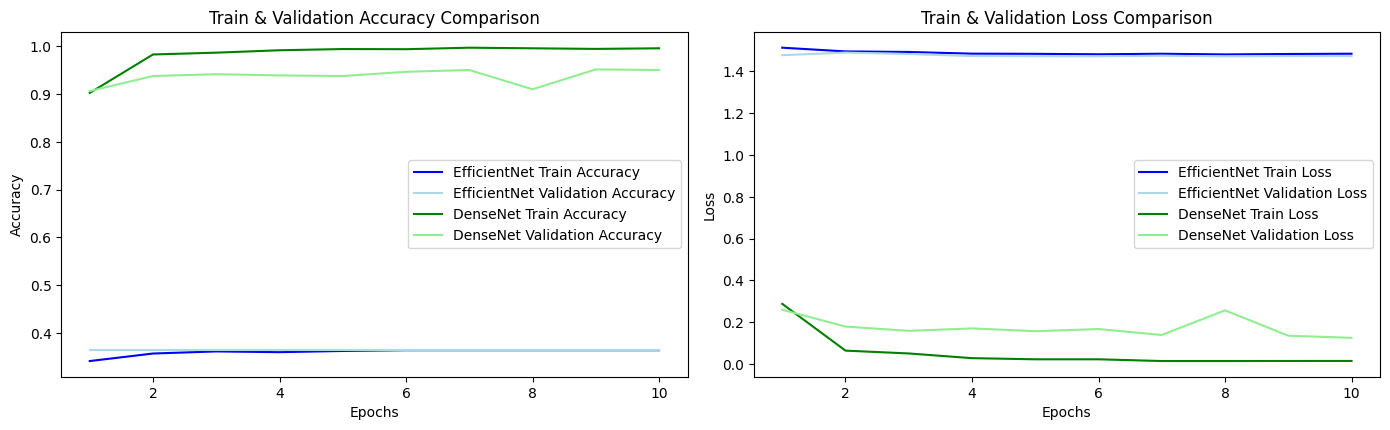

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the training history for both models
# EfficientNet history
eff_history = efficientnet_model.history  # Use EfficientNet's history object after training

# DenseNet history
dense_history = densenet_model.history  # Use DenseNet's history object after training

# Number of epochs
epochs = np.arange(1, len(eff_history.history['accuracy']) + 1)

# Prepare data for plotting
eff_train_acc = eff_history.history['accuracy']
dense_train_acc = dense_history.history['accuracy']

eff_val_acc = eff_history.history['val_accuracy']
dense_val_acc = dense_history.history['val_accuracy']

eff_train_loss = eff_history.history['loss']
dense_train_loss = dense_history.history['loss']

eff_val_loss = eff_history.history['val_loss']
dense_val_loss = dense_history.history['val_loss']

# Create a figure for subplots
plt.figure(figsize=(14, 8))

# Subplot 1: Accuracy for both models
plt.subplot(2, 2, 1)
plt.plot(epochs, eff_train_acc, label='EfficientNet Train Accuracy', color='blue')
plt.plot(epochs, eff_val_acc, label='EfficientNet Validation Accuracy', color='lightblue')
plt.plot(epochs, dense_train_acc, label='DenseNet Train Accuracy', color='green')
plt.plot(epochs, dense_val_acc, label='DenseNet Validation Accuracy', color='lightgreen')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train & Validation Accuracy Comparison')
plt.legend()

# Subplot 2: Loss for both models
plt.subplot(2, 2, 2)
plt.plot(epochs, eff_train_loss, label='EfficientNet Train Loss', color='blue')
plt.plot(epochs, eff_val_loss, label='EfficientNet Validation Loss', color='lightblue')
plt.plot(epochs, dense_train_loss, label='DenseNet Train Loss', color='green')
plt.plot(epochs, dense_val_loss, label='DenseNet Validation Loss', color='lightgreen')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Validation Loss Comparison')
plt.legend()

plt.tight_layout()
plt.show()


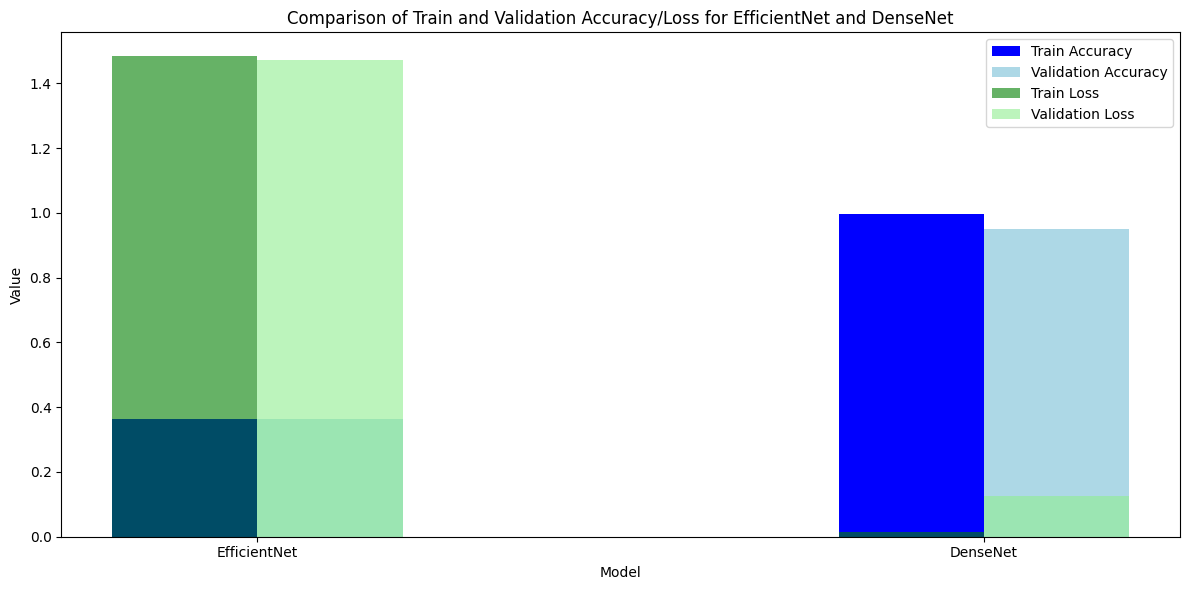

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get final accuracy and loss for both models
eff_train_acc = eff_history.history['accuracy'][-1]  # Final train accuracy of EfficientNet
dense_train_acc = dense_history.history['accuracy'][-1]  # Final train accuracy of DenseNet

eff_val_acc = eff_history.history['val_accuracy'][-1]  # Final validation accuracy of EfficientNet
dense_val_acc = dense_history.history['val_accuracy'][-1]  # Final validation accuracy of DenseNet

eff_train_loss = eff_history.history['loss'][-1]  # Final train loss of EfficientNet
dense_train_loss = dense_history.history['loss'][-1]  # Final train loss of DenseNet

eff_val_loss = eff_history.history['val_loss'][-1]  # Final validation loss of EfficientNet
dense_val_loss = dense_history.history['val_loss'][-1]  # Final validation loss of DenseNet

# Set up the bar graph data
models = ['EfficientNet', 'DenseNet']
train_acc = [eff_train_acc, dense_train_acc]
val_acc = [eff_val_acc, dense_val_acc]
train_loss = [eff_train_loss, dense_train_loss]
val_loss = [eff_val_loss, dense_val_loss]

# Bar Width
bar_width = 0.2
index = np.arange(len(models))

# Create subplots
plt.figure(figsize=(12, 6))

# Plot Accuracy comparison
plt.bar(index - bar_width/2, train_acc, bar_width, label='Train Accuracy', color='blue')
plt.bar(index + bar_width/2, val_acc, bar_width, label='Validation Accuracy', color='lightblue')

# Plot Loss comparison
plt.bar(index - bar_width/2, train_loss, bar_width, label='Train Loss', color='green', alpha=0.6)
plt.bar(index + bar_width/2, val_loss, bar_width, label='Validation Loss', color='lightgreen', alpha=0.6)

# Labels and title
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of Train and Validation Accuracy/Loss for EfficientNet and DenseNet')
plt.xticks(index, models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step


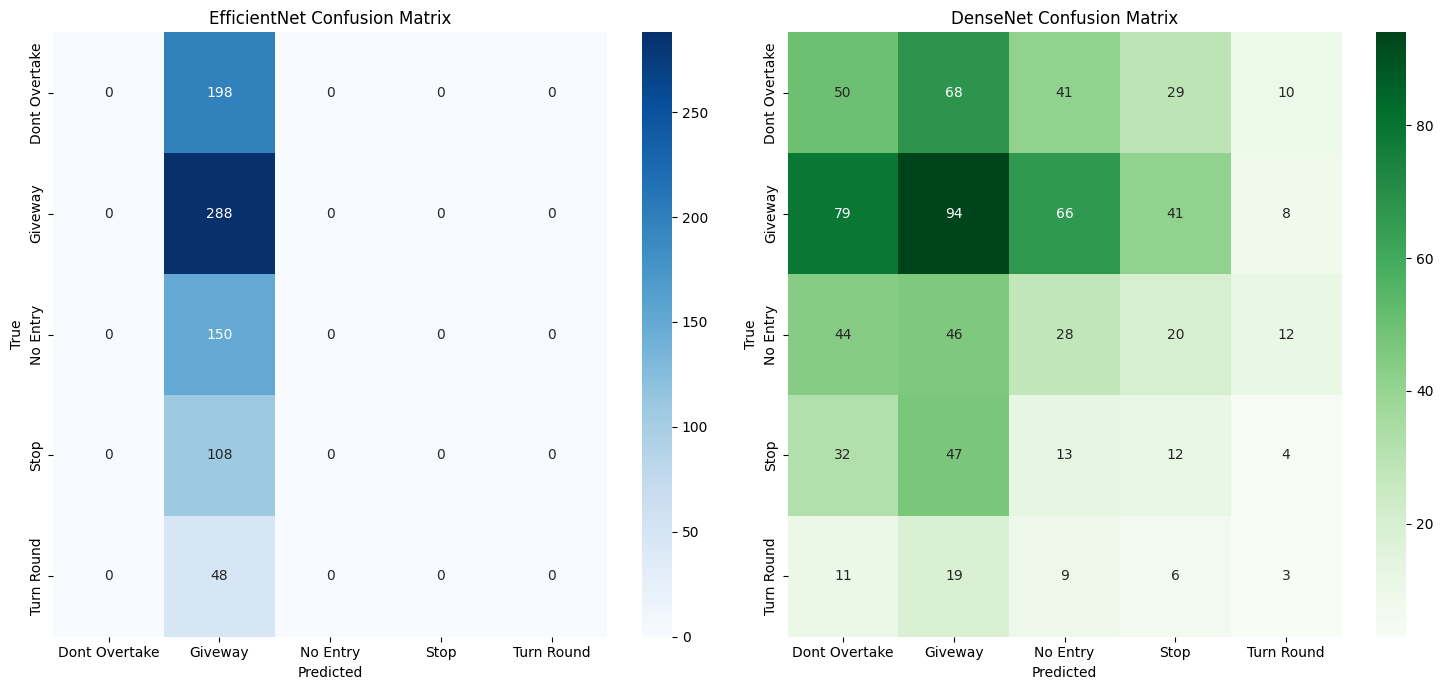

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true labels from the validation data
y_true = val_data.classes

# Get predictions for both models
y_pred_eff = np.argmax(efficientnet_model.predict(val_data), axis=1)
y_pred_dense = np.argmax(densenet_model.predict(val_data), axis=1)

# Generate confusion matrices
cm_eff = confusion_matrix(y_true, y_pred_eff)
cm_dense = confusion_matrix(y_true, y_pred_dense)

# Create a figure with two subplots for side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot confusion matrix for EfficientNet
sns.heatmap(cm_eff, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values(), ax=ax[0])
ax[0].set_title('EfficientNet Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Plot confusion matrix for DenseNet
sns.heatmap(cm_dense, annot=True, fmt='d', cmap='Greens', xticklabels=class_mapping.values(), yticklabels=class_mapping.values(), ax=ax[1])
ax[1].set_title('DenseNet Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

# Display the plot
plt.tight_layout()
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step


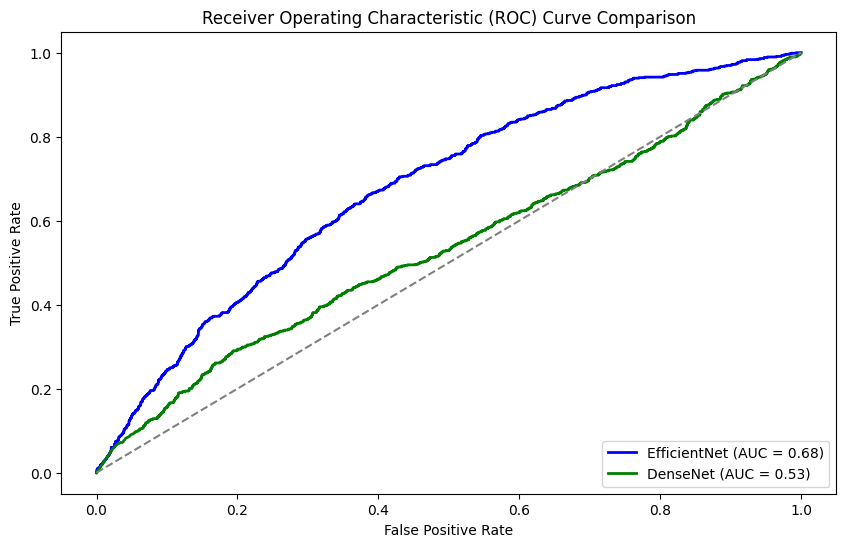

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)

# EfficientNet Predictions
y_pred_eff_prob = efficientnet_model.predict(val_data, verbose=1)
fpr_eff, tpr_eff, _ = roc_curve(y_true_bin.ravel(), y_pred_eff_prob.ravel())
roc_auc_eff = auc(fpr_eff, tpr_eff)

# DenseNet Predictions
y_pred_dense_prob = densenet_model.predict(val_data, verbose=1)
fpr_dense, tpr_dense, _ = roc_curve(y_true_bin.ravel(), y_pred_dense_prob.ravel())
roc_auc_dense = auc(fpr_dense, tpr_dense)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_eff, tpr_eff, color='blue', lw=2, label=f'EfficientNet (AUC = {roc_auc_eff:.2f})')
plt.plot(fpr_dense, tpr_dense, color='green', lw=2, label=f'DenseNet (AUC = {roc_auc_dense:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()


c:\Users\manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


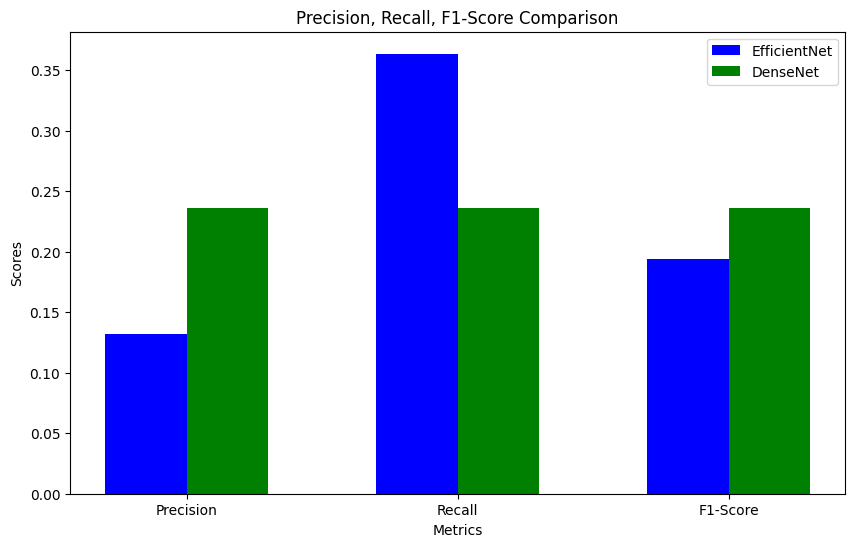

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for EfficientNet
precision_eff = precision_score(y_true, y_pred_eff, average='weighted')
recall_eff = recall_score(y_true, y_pred_eff, average='weighted')
f1_eff = f1_score(y_true, y_pred_eff, average='weighted')

# Calculate metrics for DenseNet
precision_dense = precision_score(y_true, y_pred_dense, average='weighted')
recall_dense = recall_score(y_true, y_pred_dense, average='weighted')
f1_dense = f1_score(y_true, y_pred_dense, average='weighted')

# Bar plot comparison
metrics = ['Precision', 'Recall', 'F1-Score']
eff_metrics = [precision_eff, recall_eff, f1_eff]
dense_metrics = [precision_dense, recall_dense, f1_dense]

x = np.arange(len(metrics))
width = 0.3

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, eff_metrics, width, label='EfficientNet', color='blue')
plt.bar(x + width/2, dense_metrics, width, label='DenseNet', color='green')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Precision, Recall, F1-Score Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.show()
